In [2]:
import pandas as pd
import numpy as np

In [31]:
def read_in(file):
    df = pd.read_csv(file)
    df.drop(["metro_area", "place_id", "country_region", "iso_3166_2_code"], inplace = True, axis = 1)
    df.columns = ["country", "state", "county", "fips code", "date", \
    "retail_rec", "grocery_pharm", "parks", "transit", "workplace", "residential"]
    df_IL = df[df["state"].isin(["Illinois", "Massachusetts"]) ]
    return df_IL

In [32]:
df = read_in("Raw Data/2020_US_Region_Mobility_Report.csv")
print(df["date"].nunique())
df.head()

321


,country,state,county,fips code,date,retail_rec,grocery_pharm,parks,transit,workplace,residential
159493,US,Illinois,NaN,NaN,2020-02-15,4.0,3.0,10.0,3.0,3.0,-1.0
159494,US,Illinois,NaN,NaN,2020-02-16,8.0,2.0,29.0,3.0,2.0,-1.0
159495,US,Illinois,NaN,NaN,2020-02-17,2.0,-3.0,-14.0,-13.0,-23.0,6.0
159496,US,Illinois,NaN,NaN,2020-02-18,1.0,-1.0,5.0,2.0,1.0,0.0
159497,US,Illinois,NaN,NaN,2020-02-19,1.0,-1.0,3.0,2.0,1.0,0.0


In [37]:
# Explore Missing Data
miss = df.drop('county', 1).isna().groupby([df.county], sort=False).sum().reset_index()
miss["total"] = miss.iloc[:,-6:].sum(axis=1)
print(miss[miss["total"] > 296]["county"].shape)
miss.sort_values(by="total", ascending=False)

(86,)


,county,country,state,fips code,date,retail_rec,grocery_pharm,parks,transit,workplace,residential,total
14,Crawford County,0,0,0,0,243,278,296,296,0,291,1404
31,Hancock County,0,0,0,0,250,250,296,296,0,296,1388
86,Union County,0,0,0,0,245,245,296,296,0,296,1378
81,Shelby County,0,0,0,0,245,296,296,296,0,233,1366
20,Edgar County,0,0,0,0,243,266,296,296,0,257,1358
...,...,...,...,...,...,...,...,...,...,...,...,...
80,Scott County,0,0,0,0,2,2,2,2,0,2,10
19,DuPage County,0,0,0,0,0,0,5,2,0,0,7
13,Cook County,0,0,0,0,0,0,0,0,0,0,0
105,Middlesex County,0,0,0,0,0,0,0,0,0,0,0


In [39]:
df.describe()

,fips code,retail_rec,grocery_pharm,parks,transit,workplace,residential
count,31775.000000,21266.000000,18938.000000,7755.000000,13380.000000,31821.000000,17577.000000
mean,18178.157766,-12.712499,0.775583,49.389555,-17.892227,-24.486345,8.772032
std,2711.452969,19.543762,15.170176,73.380241,27.152547,16.177151,6.482459
min,17001.000000,-93.000000,-91.000000,-83.000000,-89.000000,-89.000000,-8.000000
25%,17061.000000,-24.000000,-8.000000,-2.000000,-38.000000,-35.000000,4.000000
50%,17117.000000,-11.000000,0.000000,34.000000,-17.000000,-25.000000,8.000000
75%,17179.000000,0.000000,8.000000,88.000000,2.000000,-14.000000,13.000000
max,25027.000000,118.000000,83.000000,709.000000,134.000000,26.000000,37.000000


In [50]:
df['date']= pd.to_datetime(df['date'])
df

,country,state,county,fips code,date,retail_rec,grocery_pharm,parks,transit,workplace,residential
159493,US,Illinois,NaN,NaN,2020-02-15,4.0,3.0,10.0,3.0,3.0,-1.0
159494,US,Illinois,NaN,NaN,2020-02-16,8.0,2.0,29.0,3.0,2.0,-1.0
159495,US,Illinois,NaN,NaN,2020-02-17,2.0,-3.0,-14.0,-13.0,-23.0,6.0
159496,US,Illinois,NaN,NaN,2020-02-18,1.0,-1.0,5.0,2.0,1.0,0.0
159497,US,Illinois,NaN,NaN,2020-02-19,1.0,-1.0,3.0,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
322910,US,Massachusetts,Worcester County,25027.0,2020-12-27,-27.0,-24.0,-11.0,-27.0,-19.0,8.0
322911,US,Massachusetts,Worcester County,25027.0,2020-12-28,-14.0,-9.0,15.0,-27.0,-46.0,15.0
322912,US,Massachusetts,Worcester County,25027.0,2020-12-29,-14.0,-7.0,-9.0,-24.0,-44.0,16.0
322913,US,Massachusetts,Worcester County,25027.0,2020-12-30,-8.0,3.0,-5.0,-21.0,-44.0,15.0


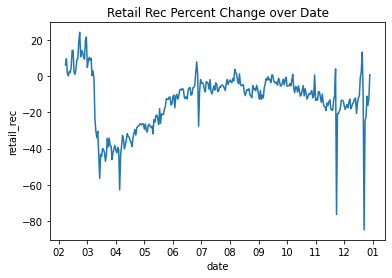

In [52]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
sns.lineplot(x=df.date, y="retail_rec", data=df).\
set(title="Retail Rec Percent Change over Date")
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=30))
plt.show()

<AxesSubplot:xlabel='date', ylabel='retail_rec'>

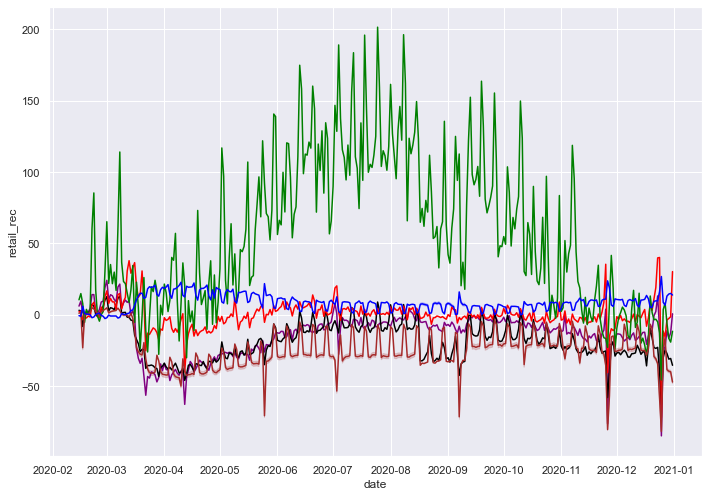

In [59]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(x=df.date, y="retail_rec", data=df, color='purple')
sns.lineplot(x=df.date, y="transit", data=df, color='black')
sns.lineplot(x=df.date, y="grocery_pharm", data=df, color='red')
sns.lineplot(x=df.date, y="parks", data=df, color='green')
sns.lineplot(x=df.date, y="workplace", data=df, color='orange')
sns.lineplot(x=df.date, y="residential", data=df, color='blue')

<AxesSubplot:xlabel='date', ylabel='retail_rec'>

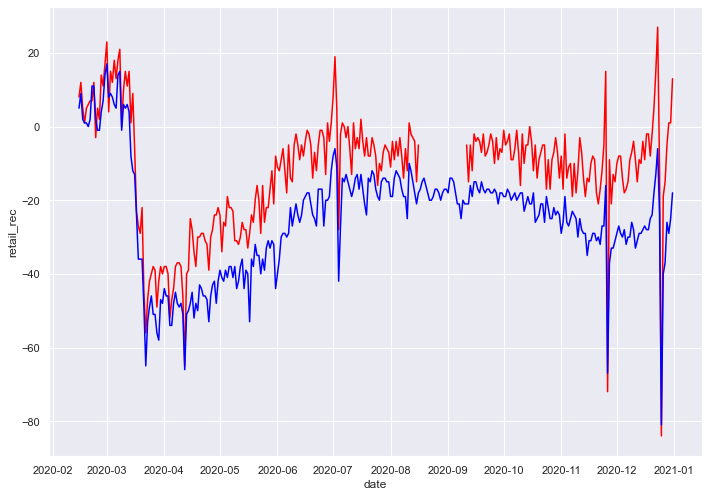

In [63]:
data_conserv= df[df["county"]== "Effingham County"]
data_lib= df[df["county"]== "Cook County"]
sns.lineplot(x=df.date, y="retail_rec", data=data_conserv, color='red')
sns.lineplot(x=df.date, y="retail_rec", data=data_lib, color='blue')